In [4]:
from fastai.data.external import *
from fastbook import *
from fastai.vision.widgets import *
from dotenv import load_dotenv

In [7]:
key_azure = os.environ.get('AZURE_SEARCH_KEY')
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

## Dog Classifier Notebook
This notebook will be used to **acquire, clean, and label** the dog dataset; then the model will be trained and exported.

In [6]:
search_images_bing??

Signature: search_images_bing(key, term, min_sz=128, max_images=150)
Docstring: <no docstring>
Source:   
def search_images_bing(key, term, min_sz=128, max_images=150):
    params = dict(q=term, count=max_images, min_height=min_sz, min_width=min_sz)
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    response = requests.get(search_url, headers={"Ocp-Apim-Subscription-Key":key}, params=params)
    response.raise_for_status()
    return L(response.json()['value'])
File:      ~/anaconda3/envs/DogClassifier/lib/python3.10/site-packages/fastbook/__init__.py
Type:      function

In [11]:
wiener_dogs = search_images_bing(key_azure, 'wiener dog')

for s in wiener_dogs:
    print(s)

{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=wiener+dog&id=96B15FBE9A812F135E0BC1B367715765F1432ABC&simid=608048416186002798', 'name': 'Wiener dog cheats to win this race | The Daily Dot', 'thumbnailUrl': 'https://tse2.mm.bing.net/th?id=OIP.0jN7zlIHwWk9wO_42eJsBQHaDt&pid=Api', 'datePublished': '2021-03-03T17:31:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://www.dailydot.com/wp-content/uploads/751/58/3c599da7ec74013ce3fc4e172e38ef58.jpg', 'hostPageUrl': 'https://www.dailydot.com/unclick/dogs-cheats-race/', 'contentSize': '1738441 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://www.dailydot.com/unclick/dogs-cheats-race', 'width': 2048, 'height': 1024, 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.eeaWPO-FEkIboS0hJ7Ct4A&pid=Api', 'hostPageDomainFriendlyName': 'The Daily Dot', 'hostPageDiscoveredDate': '2017-03-29T00:00:00.0000000Z', 'thumbnail': {'width': 474, 'height': 237}, 'imageInsightsToken': 'ccid_0jN7zlIH*cp_0

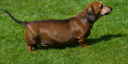

In [16]:
dest_ex = 'images/wiener_dog.jpg'
download_url(wiener_dogs[0]['contentUrl'], dest_ex)

im = Image.open(dest_ex)
im.to_thumb(256, 256)